In [2]:
import numpy as np 
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical 
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional

In [3]:
#deefine path for file
#Project Gutenberg's The Adventures of Sherlock Holmes, by Arthur Conan Doyle
SHERLOCK_FILE = '1661-0.txt'

# Read the data
with open('1661-0.txt',  encoding='utf-8-sig') as f:
    data = f.read()

# Convert to lower case and save as a list
corpus = data.lower().split("\n")

print(f"There are {len(corpus)} lines of sonnets\n")
print(f"The first 5 lines look like this:\n")
for i in range(5):
  print(corpus[i])

There are 12249 lines of sonnets

The first 5 lines look like this:

a scandal in bohemia
to sherlock holmes she is always _the_ woman. i have seldom heard him
mention her under any other name. in his eyes she eclipses and
predominates the whole of her sex. it was not that he felt any emotion
akin to love for irene adler. all emotions, and that one particularly,


In [4]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

In [5]:

corpus[0]

'a scandal in bohemia'

In [6]:
tokenizer.texts_to_sequences(corpus[0])

[[5],
 [],
 [564],
 [1432],
 [5],
 [],
 [1451],
 [5],
 [],
 [],
 [6],
 [],
 [],
 [1449],
 [6424],
 [2549],
 [521],
 [7999],
 [6],
 [5]]

In [7]:
tokenizer.texts_to_sequences([corpus[0]])

[[5, 937, 8, 1016]]

In [8]:
tokenizer.texts_to_sequences([corpus[0]])[0]

[5, 937, 8, 1016]

In [9]:
# GRADED FUNCTION: n_gram_seqs
def n_gram_seqs(corpus, tokenizer):
    """
    Generates a list of n-gram sequences
    
    Args:
        corpus (list of string): lines of texts to generate n-grams for
        tokenizer (object): an instance of the Tokenizer class containing the word-index dictionary
    
    Returns:
        input_sequences (list of int): the n-gram sequences for each line in the corpus
    """
    input_sequences = []
    
    ### START CODE HERE
    for line in corpus:
      token_list = tokenizer.texts_to_sequences([line])[0]
      for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)
    
    ### END CODE HERE
    
    return input_sequences

In [10]:
# Test your function with one example
first_example_sequence = n_gram_seqs([corpus[0]], tokenizer)

print("n_gram sequences for first example look like this:\n")
first_example_sequence

n_gram sequences for first example look like this:



[[5, 937], [5, 937, 8], [5, 937, 8, 1016]]

In [11]:
# Test your function with a bigger corpus
next_3_examples_sequence = n_gram_seqs(corpus[1:4], tokenizer)

print("n_gram sequences for next 3 examples look like this:\n")
next_3_examples_sequence

n_gram sequences for next 3 examples look like this:



[[3, 132],
 [3, 132, 34],
 [3, 132, 34, 38],
 [3, 132, 34, 38, 15],
 [3, 132, 34, 38, 15, 229],
 [3, 132, 34, 38, 15, 229, 1],
 [3, 132, 34, 38, 15, 229, 1, 221],
 [3, 132, 34, 38, 15, 229, 1, 221, 6],
 [3, 132, 34, 38, 15, 229, 1, 221, 6, 17],
 [3, 132, 34, 38, 15, 229, 1, 221, 6, 17, 1673],
 [3, 132, 34, 38, 15, 229, 1, 221, 6, 17, 1673, 116],
 [3, 132, 34, 38, 15, 229, 1, 221, 6, 17, 1673, 116, 35],
 [3392, 37],
 [3392, 37, 267],
 [3392, 37, 267, 89],
 [3392, 37, 267, 89, 90],
 [3392, 37, 267, 89, 90, 213],
 [3392, 37, 267, 89, 90, 213, 8],
 [3392, 37, 267, 89, 90, 213, 8, 14],
 [3392, 37, 267, 89, 90, 213, 8, 14, 150],
 [3392, 37, 267, 89, 90, 213, 8, 14, 150, 38],
 [3392, 37, 267, 89, 90, 213, 8, 14, 150, 38, 4766],
 [3392, 37, 267, 89, 90, 213, 8, 14, 150, 38, 4766, 2],
 [4767, 1],
 [4767, 1, 282],
 [4767, 1, 282, 4],
 [4767, 1, 282, 4, 37],
 [4767, 1, 282, 4, 37, 4768],
 [4767, 1, 282, 4, 37, 4768, 10],
 [4767, 1, 282, 4, 37, 4768, 10, 12],
 [4767, 1, 282, 4, 37, 4768, 10, 12, 2

In [12]:
# Apply the n_gram_seqs transformation to the whole corpus
input_sequences = n_gram_seqs(corpus, tokenizer)

# Save max length 
max_sequence_len = max([len(x) for x in input_sequences])

print(f"n_grams of input_sequences have length: {len(input_sequences)}")
print(f"maximum length of sequences is: {max_sequence_len}")

n_grams of input_sequences have length: 101446
maximum length of sequences is: 20


In [13]:


# GRADED FUNCTION: pad_seqs
def pad_seqs(input_sequences, maxlen):
    """
    Pads tokenized sequences to the same length
    
    Args:
        input_sequences (list of int): tokenized sequences to pad
        maxlen (int): maximum length of the token sequences
    
    Returns:
        padded_sequences (array of int): tokenized sequences padded to the same length
    """
    ### START CODE HERE
    padded_sequences = np.array(pad_sequences(input_sequences, maxlen=maxlen, padding='pre'))
    
    return padded_sequences
    ### END CODE HERE

In [14]:
# Test your function with the n_grams_seq of the first example
first_padded_seq = pad_seqs(first_example_sequence, len(first_example_sequence))
first_padded_seq

array([[   0,    5,  937],
       [   5,  937,    8],
       [ 937,    8, 1016]], dtype=int32)

In [15]:
# Test your function with the n_grams_seq of the next 3 examples
next_3_padded_seq = pad_seqs(next_3_examples_sequence, max([len(s) for s in next_3_examples_sequence]))
next_3_padded_seq

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    3,  132],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           3,  132,   34],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    3,
         132,   34,   38],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    3,  132,
          34,   38,   15],
       [   0,    0,    0,    0,    0,    0,    0,    0,    3,  132,   34,
          38,   15,  229],
       [   0,    0,    0,    0,    0,    0,    0,    3,  132,   34,   38,
          15,  229,    1],
       [   0,    0,    0,    0,    0,    0,    3,  132,   34,   38,   15,
         229,    1,  221],
       [   0,    0,    0,    0,    0,    3,  132,   34,   38,   15,  229,
           1,  221,    6],
       [   0,    0,    0,    0,    3,  132,   34,   38,   15,  229,    1,
         221,    6,   17],
       [   0,    0,    0,    3,  132,   34,   38,   15,  229,    1,  221,
           6,   1

In [16]:
# Pad the whole corpus
input_sequences = pad_seqs(input_sequences, max_sequence_len)

print(f"padded corpus has shape: {input_sequences.shape}")

padded corpus has shape: (101446, 20)


In [17]:
# GRADED FUNCTION: features_and_labels
def features_and_labels(input_sequences, total_words):
    """
    Generates features and labels from n-grams
    
    Args:
        input_sequences (list of int): sequences to split features and labels from
        total_words (int): vocabulary size
    
    Returns:
        features, one_hot_labels (array of int, array of int): arrays of features and one-hot encoded labels
    """
    ### START CODE HERE
    features = input_sequences[:,:-1]
    labels = input_sequences[:,-1]
    one_hot_labels = to_categorical(labels, num_classes=total_words)
    ### END CODE HERE

    return features, one_hot_labels

In [18]:
# Test your function with the padded n_grams_seq of the first example
first_features, first_labels = features_and_labels(first_padded_seq, total_words)

print(f"labels have shape: {first_labels.shape}")
print("\nfeatures look like this:\n")
first_features

labels have shape: (3, 8916)

features look like this:



array([[  0,   5],
       [  5, 937],
       [937,   8]], dtype=int32)

In [19]:
# Split the whole corpus
features, labels = features_and_labels(input_sequences, total_words)

print(f"features have shape: {features.shape}")
print(f"labels have shape: {labels.shape}")

features have shape: (101446, 19)
labels have shape: (101446, 8916)


In [21]:
# GRADED FUNCTION: create_model
def create_model(total_words, max_sequence_len):
    """
    Creates a text generator model
    
    Args:
        total_words (int): size of the vocabulary for the Embedding layer input
        max_sequence_len (int): length of the input sequences
    
    Returns:
        model (tf.keras Model): the text generator model
    """
    model = Sequential()
    ### START CODE HERE
    model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
    #model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
    model.add(Bidirectional(LSTM(150, return_sequences = True)))
    #model.add(Dropout(0.2))
    model.add(LSTM(100))
    model.add(Dense(total_words/2, activation='relu'))
    model.add(Dense(total_words, activation='softmax'))


    # Compile the model
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    
    ### END CODE HERE

    return model

In [22]:
# Get the untrained model
model = create_model(total_words, max_sequence_len)

# Train the model
history = model.fit(features, labels, epochs=50, verbose=1)

Epoch 1/50
3171/3171 [==============================] - 70s 19ms/step - loss: 6.2842 - accuracy: 0.0639
Epoch 2/50
3171/3171 [==============================] - 61s 19ms/step - loss: 5.7597 - accuracy: 0.0952
Epoch 3/50
3171/3171 [==============================] - 61s 19ms/step - loss: 5.4615 - accuracy: 0.1170
Epoch 4/50
3171/3171 [==============================] - 61s 19ms/step - loss: 5.2410 - accuracy: 0.1291
Epoch 5/50
3171/3171 [==============================] - 62s 20ms/step - loss: 5.0597 - accuracy: 0.1412
Epoch 6/50
3171/3171 [==============================] - 63s 20ms/step - loss: 4.9067 - accuracy: 0.1508
Epoch 7/50
3171/3171 [==============================] - 61s 19ms/step - loss: 4.7608 - accuracy: 0.1599
Epoch 8/50
3171/3171 [==============================] - 61s 19ms/step - loss: 4.6269 - accuracy: 0.1671
Epoch 9/50
3171/3171 [==============================] - 62s 19ms/step - loss: 4.5009 - accuracy: 0.1741
Epoch 10/50
3171/3171 [==============================] - 61s 19m

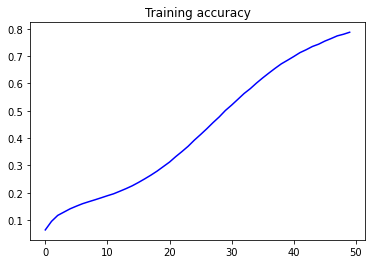

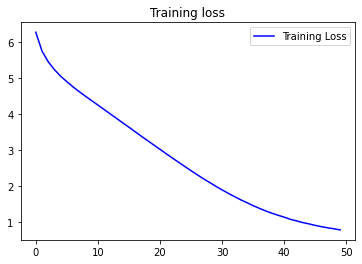

In [23]:
# Take a look at the training curves of your model

acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [24]:
def download_history():
  import pickle
  from google.colab import files

  with open('history.pkl', 'wb') as f:
    pickle.dump(history.history, f)

  files.download('history.pkl')

download_history()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [25]:
seed_text = """His manner was not effusive. It seldom was but he was glad, 
I think,to see me. With hardly a word spoken, but with a kindly eye, he waved
me to an armchair, threw across his case of cigars"""
next_words = 50
  
for _ in range(next_words):
	# Convert the text into sequences
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	# Pad the sequences
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	# Get the probabilities of predicting a word
	predicted = model.predict(token_list, verbose=0)
	# Choose the next word based on the maximum probability
	predicted = np.argmax(predicted, axis=-1).item()
	# Get the actual word from the word index
	output_word = tokenizer.index_word[predicted]
	# Append to the current text
	seed_text += " " + output_word

print(seed_text)

His manner was not effusive. It seldom was but he was glad, 
I think,to see me. With hardly a word spoken, but with a kindly eye, he waved
me to an armchair, threw across his case of cigars and indicated a little more with whiskers ” he threw himself down upon his face with his lens in his hand and in english ‘remember your promise for an hour which she was not to answer for cruelty’s article what have that they should make him whether it could ever
